# Laboratório 3
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: O Algoritmo dos K Vizinhos Mais Próximos
No Laboratório 1, utilizamos um modelo de Aprendizado de Máquina (AM) como exemplo, o K-Nearest Neighbors (KNN). O KNN funciona ao ensinar o modelo uma amostra dos dados, que aprende a posição de cada elemento em um espaço multidimensional, de forma que quando receber um dado novo, ele atribui a classe correspondente à classe majoritária entre os *k* elementos mais próximos deste no espaço multidimensional, sendo então um modelo baseado em distâncias.

Vamos entender como o KNN funciona na prática no laboratório de hoje!

## Preparando os dados
Antes de mais nada, precisamos configurar nosso ambiente e importar a base de dados que vamos utilizar, que neste exemplo será a Wine, disponibilizada pelo scikit-lear. Nosso objetivo será utilizar os atributos de cada vinho para prever sua classe, entre as possíveis ``class_0``, ``class_1`` e ``class_2``, que fazem referência ao tipo de uva utilizado no vinho. Para isso, podemos separar os dados em um DataFrame ``X`` de atributos e uma Series ``y`` de classes, de forma que usaremos ``X`` para prever ``y``.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

In [2]:
display(X)
display(y)
display(X.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Como o KNN aprende uma amostra dos dados para prever dados novos, precisamos separar os dados entre os que ensinaremos para o modelo e os que usaremos para conferir se está funcionando. Para isso, separamos a base em dados de **treino** e dados de **teste**. Essa é uma prática muito comum em algoritmos de AM, utilizada para verificar que o modelo realmente está cumprindo seu propósito. Note que para isso, não podemos dar nenhuma informação (ou spoiler) sobre os dados de teste para o modelo, então vamos realizar essa separação antes mesmo das outras técnicas de pré-processamento.
A função ``train_test_split`` do scikit-learn faz essa separação automaticamente, apenas é preciso fornecer uma porcentagem (no nosso caso, usaremos 30% dos dados para teste e 70% para treino) e uma semente de aleatorização, se quisermos que os dados sejam separados da mesma forma se executarmos a função novamente. O parâmetro ``stratify`` define que a divisão mantenha a proporção dos dados com base no valor informado, garantindo que uma classe não esteja mais presente do que deveria na base de treinamento do que outra, sendo especialmente relevante em bases desbalanceadas.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
display(X_train.shape)
display(X_test.shape)

(124, 13)

(54, 13)

Prosseguindo com o pré-processamento, como é uma base mais didática, não devemos esperar dados ausentes, duplicados ou inconsistentes, mas sinta-se livre para verificar por si só.

Porém, ainda precisamos normalizar os dados. Como o KNN é baseado em distâncias, ele é fortemente afetado por dados com escalas diferentes. Por exemplo, o atributo ``nonflavanoid_phenols`` varia de 0.13 a 0.66, enquanto o ``magnesium`` varia de 70 a 162, tendo um impacto muito maior no cálculo da distância. Se fosse o caso, também precisaríamos transformar valores categóricos em numéricos, para que pudessem ser contabilizados adequadamente para as distâncias.

Para evitar a contaminação dos dados de teste com os dados de treinamento, definiremos a normalização apenas com os dados de treino, mas aplicaremos em ambas as bases. Na prática, estamos realizando a equação ``(valor - (média da base de treino)) / (desvio padrão da base de treino)``, para cada ``valor`` da base de treino e teste. Dessa vez, utilizaremos a função ``StandardScaler``. 

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit_transform aprende as medidas para normalização e aplica a transformação
X_test = scaler.transform(X_test) # transform aplica a transformação aprendida

## Treinando e testando o modelo

O scikit-learn já possui o modelo do KNN para classificação implementado, o ``KNeighborsClassifier``. Para usá-lo, precisamos definir um modelo que o utiliza e seus parâmetros, no caso, o valor de *k*, definido por ``n_neighbors``. Então, podemos treinar o modelo nos dados de treino com a função ``fit`` e realizar a previsão para os dados de teste com a função ``predict``.

Vamos também calcular a acurácia, ou seja, a porcentagem de acertos da base de teste, e algumas outras métricas, para ver quão bem nosso modelo executou.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

'Acurácia: 0.94'

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.86      0.92        21
     class_2       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



Tivemos uma acurácia de 94%, o que já é um bom resultado, mesmo que tenha alguns erros!

Como a base tem 13 dimensões, não podemos visualizar a classificação no espaço multidiminsional como fizemos no primeiro laboratório, mas ainda podemos visualizar a matriz de confusão.

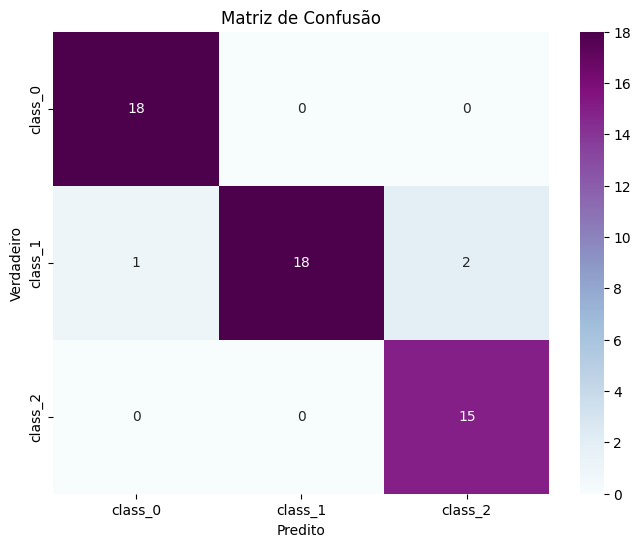

In [6]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="BuPu",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# Exemplo 2: Redução de Dimensionalidade

# Exemplo 1.1: KNN com base reduzida

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
#y_train = pd.DataFrame(y_train)
#final_pca_df = pca_df
#final_pca_df['target'] = y_train


In [8]:
X_train_pca = pca_df
X_test_pca = pca.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
display(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


c:\Users\tc832715\Aprendizado-de-Maquina-2025-2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Acurácia: 0.94'

              precision    recall  f1-score   support

     class_0       0.94      0.89      0.91        18
     class_1       0.91      0.95      0.93        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



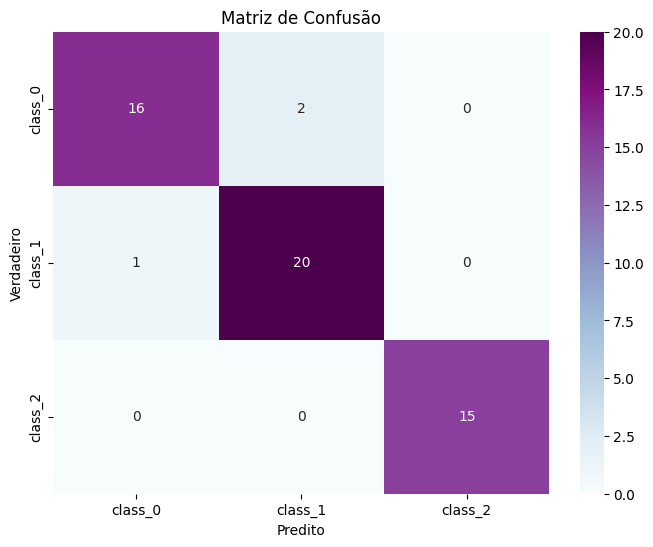

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="BuPu",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

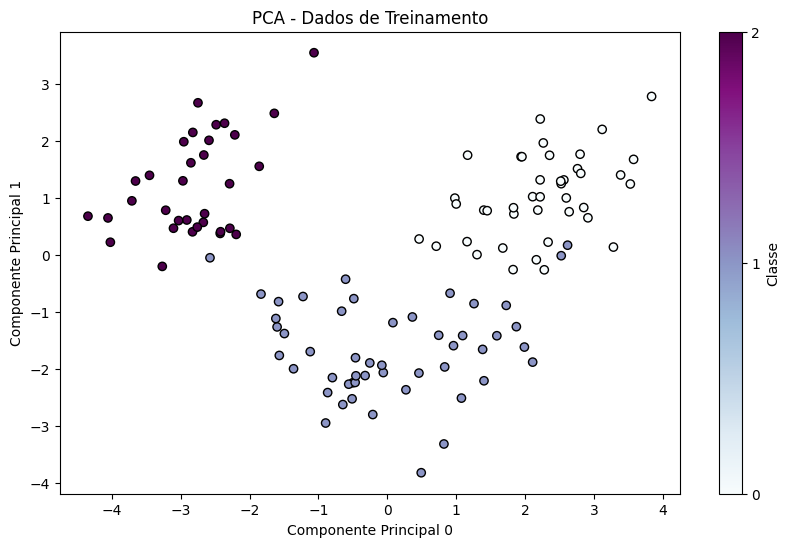

In [15]:
# scatter plot train data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], c=y_train, cmap="BuPu", edgecolor="k")
plt.xlabel("Componente Principal 0")
plt.ylabel("Componente Principal 1")
plt.title("PCA - Dados de Treinamento")
plt.colorbar(scatter, ticks=range(3), label="Classe")
plt.show()

c:\Users\tc832715\Aprendizado-de-Maquina-2025-2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


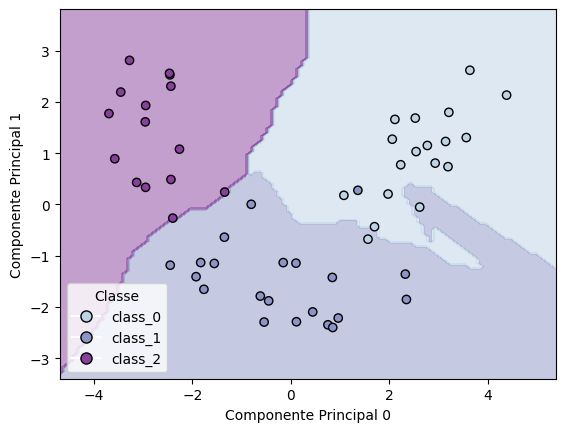

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Use BuPu palette for 3 classes
colors = sns.color_palette("BuPu", n_colors=3)
cmap = ListedColormap(colors)

disp = DecisionBoundaryDisplay.from_estimator(
    model, X_test_pca, response_method="predict",
    xlabel="Componente Principal 0", ylabel="Componente Principal 1",
    alpha=0.5, cmap=cmap
)
scatter = disp.ax_.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap, edgecolor="k", label=wine.target_names
)
# Add legend for classes
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=colors[i], markersize=8, markeredgecolor='k')
           for i, cls in enumerate(wine.target_names)]
disp.ax_.legend(handles=handles, title="Classe")
plt.show()